In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [100]:
kospi = pd.read_csv(r'..\..\..\Code\SH\csv\1220kospi.csv', encoding='euc-kr')

In [101]:
kospi

,회사명,거래소코드,회계년도,자기자본배율,당좌비율,이자보상배율(이자비용),재고자산회전률,매출채권회전률,매출액증가율,영업이익증가율,...,경영자본회전률,비유동자산회전률,유형자산회전율,매입채무회전률,설비투자효율,총자본투자효율,자기자본증가율,순이익증가율,유형자산증가율,유동자산증가율
0,(주)DB하이텍,990,2000/12,583.23,32.25,1.01,4.90,11.50,44.94,13.65,...,1.13,1.51,1.90,8.71,30.55,16.40,0.50,33.37,4.12,-11.29
1,(주)DB하이텍,990,2001/12,591.05,25.72,1.37,4.98,13.34,-2.38,11.98,...,1.12,1.42,1.80,8.02,26.73,14.12,1.34,-59.26,2.62,-11.23
2,(주)DB하이텍,990,2002/12,603.31,19.53,1.50,4.62,16.53,-6.29,-7.27,...,1.06,1.25,1.66,7.61,29.53,15.29,2.07,191.22,-0.04,1.84
3,(주)DB하이텍,990,2003/12,648.28,25.92,1.27,4.78,18.43,7.11,-21.03,...,1.10,1.30,1.78,8.10,26.41,13.26,7.45,-19.97,0.36,14.35
4,(주)DB하이텍,990,2004/12,754.92,26.15,2.94,5.19,20.72,34.37,116.51,...,1.35,1.78,2.35,8.49,33.46,15.22,16.45,213.98,2.40,36.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15672,흥아해운(주),3280,2013/12,332.88,63.49,1.00,54.67,29.89,5.54,-46.11,...,1.95,1.91,3.26,18.41,28.22,11.18,24.54,17.89,-7.35,47.15
15673,흥아해운(주),3280,2014/12,363.43,57.04,0.96,57.17,27.66,6.21,-5.42,...,1.80,1.83,2.93,17.00,16.96,8.64,9.18,1.17,46.06,-13.57
15674,흥아해운(주),3280,2007/12,471.40,31.00,-0.46,69.90,23.12,-3.20,0.00,...,1.82,1.84,2.20,13.24,18.72,11.44,-14.34,0.00,15.93,12.20
15675,흥아해운(주),3280,2008/12,475.85,48.03,0.10,82.41,25.66,24.26,0.00,...,1.85,1.84,2.30,16.52,19.76,11.90,0.94,0.00,21.82,41.06


In [102]:
kospi=kospi.rename(columns={'이자보상배율_이자비용_':'이자보상비율'})

In [103]:
#특수문자 _로 변경
col_list = list(kospi.columns)

import re
for k in range(len(col_list)):
    filtered_col = re.sub(r'[^\d\w]', '_',col_list[k])
    col_list[k] = filtered_col

kospi.columns = col_list

In [104]:
#첫글자가 숫자인 칼럼 _로 변경
col_list = list(kospi.columns)

for i in range(len(col_list)):

    if col_list[i][0] == '1':
        col_list[i] = '_'+ col_list[i]
    else :
        pass
    
kospi.columns = col_list

In [105]:
kospi.columns

Index(['회사명', '거래소코드', '회계년도', '자기자본배율', '당좌비율', '이자보상배율_이자비용_', '재고자산회전률',
       '매출채권회전률', '매출액증가율', '영업이익증가율', '부가가치율', '부채비율', '유동비율', '유동부채비율',
       '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '매출액순이익률', '매출액영업이익률',
       '당좌자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '유형자산회전율', '매입채무회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율'],
      dtype='object')

In [75]:
#nan 처리
cpylist = kospi['회사명'].unique()

for i in range(len(cpylist)):
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='bfill') # 후년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='pad') # 전년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(0)

In [76]:
kospi.isna().sum()

회사명             0
거래소코드           0
회계년도            0
자기자본배율          0
당좌비율            0
이자보상배율_이자비용_    0
재고자산회전률         0
매출채권회전률         0
매출액증가율          0
영업이익증가율         0
부가가치율           0
부채비율            0
유동비율            0
유동부채비율          0
자기자본순이익률        0
총자본순이익률         0
자기자본영업이익률       0
총자본영업이익률        0
매출액순이익률         0
매출액영업이익률        0
당좌자산회전률         0
자기자본회전률         0
경영자본회전률         0
비유동자산회전률        0
유형자산회전율         0
매입채무회전률         0
설비투자효율          0
총자본투자효율         0
자기자본증가율         0
순이익증가율          0
유형자산증가율         0
유동자산증가율         0
dtype: int64

In [10]:
""" col=['부채구성비율',
'순운전자본비율',
'경영자본순이익률',
'총자본순이익률',
'매입채무회전률',
'경영자본회전률',
'설비투자효율',
'총자본투자효율',
'자기자본증가율',
'재고자산보유기간',
'매출채권회수기간',

'비유동장기적합률',
'자기자본순이익률'] """

In [11]:
# 안정성
# kospi['부채구성비율'] = (kospi['부채총계_요약__백만원_']/kospi['자산총계_요약__백만원_'])*100

In [12]:
# #현금흐름지표
# kospi['재고자산보유기간'] = 365/kospi['재고자산회전률']
# kospi['매출채권회수기간'] = 365/kospi['매출채권회전률']

In [9]:
"""
plt.rcParams['font.family'] = 'malgun gothic'
cor = kospi[col].corr()
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (12, 12) #그림사이즈 지정
plt.title("KOSPI : Correlation of Features", y = 1.05, size = 15)
sns.heatmap(cor, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})
"""

NameError: name 'col' is not defined

In [19]:
"""
#inf를 nan처리하여 직전, 직후값 처리
import numpy as np

print("Original DataFrame:") 
print('kospi')

print("Removing infinite values:") 
kospi = kospi.replace([np.inf, -np.inf], np.nan) # replace 메서드로 np.inf를 None(np.nan)으로 변경 print(df)
print(kospi)

cpylist = kospi['회사명'].unique()

for i in range(len(cpylist)):
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='pad') # 전년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(method='bfill') # 후년 데이터로 대체
    kospi.loc[kospi['회사명'] == cpylist[i]] = kospi.loc[kospi['회사명'] == cpylist[i]].fillna(0)
    
"""

Original DataFrame:
kospi
Removing infinite values:
            회사명  거래소코드     회계년도  소속코드 상장폐지일 감사의견코드  자기자본증가율  경영자본순이익률  \
0      (주)DB하이텍    990  2000/12   1.0     0     UQ     0.50      1.92   
1      (주)DB하이텍    990  2001/12   1.0     0     UQ     1.34      0.79   
2      (주)DB하이텍    990  2002/12   1.0     0     UQ     2.07      2.34   
3      (주)DB하이텍    990  2003/12   1.0     0     UQ     7.45      1.80   
4      (주)DB하이텍    990  2004/12   1.0     0     UQ    16.45      5.18   
...         ...    ...      ...   ...   ...    ...      ...       ...   
15672   흥아해운(주)   3280  2013/12   1.0     0     UQ    24.54      4.29   
15673   흥아해운(주)   3280  2014/12   1.0     0     UQ     9.18      3.77   
15674   흥아해운(주)   3280  2007/12   1.0     0     UQ   -14.34     -3.34   
15675   흥아해운(주)   3280  2008/12   1.0     0     UQ     0.94      0.78   
15676   흥아해운(주)   3280  2004/12   1.0     0     UQ   303.43     11.56   

       총자본순이익률  자기자본순이익률  ...  매입채무회전률  총자본투자효율  설비투자효율  재고자산회전률  매출채권회

In [77]:
kosdaq = pd.read_csv(r'..\..\..\Code\SH\1. 데이터생성\최종\merge+7.6.2_.csv')
kosdaq.columns

Index(['Unnamed: 0', '회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '유동비율', '당좌비율',
       '유동부채비율', '비유동비율', '순운전자본비율', '부채비율', '차입금의존도', '비유동장기적합률',
       '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률',
       '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률', '매출액영업이익률', '당좌자산회전률',
       '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '매출채권회전률', '매입채무회전률',
       '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율', '매출액증가율', '영업이익증가율',
       '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액', '부채구성비율', '청산가치율',
       '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율', '매출원가율', '부가가치율',
       '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율', 'EBITDA유동부채비율',
       'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율', '영업이익대비EBITDA비율',
       '자기자본배당률', '금융비용_대_부채비율', '자기자본배율', '총자산영업이익률', '총자산회전율', 'log총자산',
       'log총자산회전률', '자본/부채', '이익잉여금/총자산', 'key', '종가변동률', '정기공시제목', '수시공시제목',
       '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자',
       '출자목적_경영권', '출자목적_영업이익', '기타'

In [ ]:
col2 = ['']

In [78]:
col = ['부가가치율', '부채비율', '유동비율', '유동부채비율',
       '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '매출액순이익률', '매출액영업이익률',
       '당좌자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '유형자산회전율', '매입채무회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율']

In [ ]:
'', '', '', '',
       '', '', '', '부가가치율', '', '', '',
       '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '매출액순이익률', '매출액영업이익률',
       '당좌자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률', '유형자산회전율', '매입채무회전률',
       '설비투자효율', '총자본투자효율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율'

In [79]:
kospi = kospi[col]
kosdaq = kosdaq[col]

In [94]:
print(kospi.columns)
print(kosdaq.columns)
print(len(kosdaq.columns))

Index(['부가가치율', '부채비율', '유동비율', '유동부채비율', '자기자본순이익률', '총자본순이익률', '자기자본영업이익률',
       '총자본영업이익률', '매출액순이익률', '매출액영업이익률', '당좌자산회전률', '자기자본회전률', '경영자본회전률',
       '비유동자산회전률', '유형자산회전율', '매입채무회전률', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '순이익증가율', '유형자산증가율', '유동자산증가율'],
      dtype='object')
Index(['부가가치율', '부채비율', '유동비율', '유동부채비율', '자기자본순이익률', '총자본순이익률', '자기자본영업이익률',
       '총자본영업이익률', '매출액순이익률', '매출액영업이익률', '당좌자산회전률', '자기자본회전률', '경영자본회전률',
       '비유동자산회전률', '유형자산회전율', '매입채무회전률', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '순이익증가율', '유형자산증가율', '유동자산증가율'],
      dtype='object')
22


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
kosdaq_s = scaler.fit_transform(kosdaq)
kosdaq_s = pd.DataFrame(kosdaq_s, columns=kosdaq.columns, index=list(kosdaq.index.values))
kosdaq_s

,부가가치율,부채비율,유동비율,유동부채비율,자기자본순이익률,총자본순이익률,자기자본영업이익률,총자본영업이익률,매출액순이익률,매출액영업이익률,...,경영자본회전률,비유동자산회전률,유형자산회전율,매입채무회전률,설비투자효율,총자본투자효율,자기자본증가율,순이익증가율,유형자산증가율,유동자산증가율
0,0.020929,0.000282,-0.019465,0.035935,0.056438,0.077033,-0.068990,-0.145799,0.025761,0.024509,...,-0.464167,0.127943,-0.040547,-0.024702,0.007008,-0.018438,-0.089801,-0.039227,-0.022833,-0.052980
1,0.022871,0.000282,-0.019465,0.035935,0.056438,0.077033,-0.068990,-0.145799,0.025761,0.024509,...,-0.464167,0.127943,-0.040547,-0.024702,0.007008,-0.018438,-0.089801,-0.039227,-0.022833,-0.052980
2,0.020169,-0.001414,-0.020676,0.036364,-0.242755,-0.351437,-1.302266,-1.656967,0.023776,0.018746,...,0.471741,0.509252,-0.033098,-0.020345,0.006981,-0.126136,-0.177087,-0.039227,-0.025679,-0.145328
3,0.022656,-0.050514,-0.017447,-0.032391,0.060728,0.086958,-0.473742,-0.706089,0.025746,0.021995,...,0.274014,0.309932,-0.029632,-0.024478,0.007153,0.090206,-0.095076,-0.039227,-0.035582,-0.084734
4,0.016404,-0.027135,-0.019070,0.001586,-0.795516,-1.518397,-1.610759,-2.594375,0.019251,0.016192,...,0.643104,0.860229,0.000789,-0.024789,0.006730,-0.649491,-0.294659,-0.039227,-0.026999,-0.179764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26786,0.021239,-0.094868,-0.007229,-0.107196,0.075059,0.151146,-0.114220,-0.157921,0.025935,0.024089,...,2.053557,-0.140706,-0.041645,22.958700,0.006990,-0.017357,-0.085071,-0.057720,-0.023734,-0.035844
26787,0.021156,-0.094745,-0.017815,-0.098572,0.073109,0.145522,-0.121642,-0.177450,0.025897,0.024022,...,2.356739,-0.101708,-0.040719,0.617804,0.006990,-0.017897,-0.086977,-0.042960,-0.022923,-0.035867
26788,0.021136,-0.100755,-0.010958,-0.106958,0.077106,0.160741,-0.110508,-0.145799,0.025918,0.024085,...,2.699466,-0.058378,-0.040073,0.628614,0.006991,-0.004385,-0.086432,-0.028595,-0.022891,-0.102383
26789,0.022490,-0.099299,-0.003895,-0.106225,0.153830,0.404919,-0.130920,-0.198326,0.026793,0.023969,...,2.159012,-0.097375,-0.040633,2.979954,0.007005,0.106692,-0.058119,0.140555,-0.023957,0.135261


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kospi_s = scaler.fit_transform(kospi)
kospi_s = pd.DataFrame(kospi_s, columns=kospi.columns, index=list(kospi.index.values))
kospi_s

,부가가치율,부채비율,유동비율,유동부채비율,자기자본순이익률,총자본순이익률,자기자본영업이익률,총자본영업이익률,매출액순이익률,매출액영업이익률,...,경영자본회전률,비유동자산회전률,유형자산회전율,매입채무회전률,설비투자효율,총자본투자효율,자기자본증가율,순이익증가율,유형자산증가율,유동자산증가율
0,0.017306,0.002790,-0.124955,-0.005308,0.028671,-0.004184,0.224475,0.192904,0.012323,0.017753,...,-0.099362,-0.152659,-0.009409,-0.016933,-0.021239,0.097724,-0.041572,-0.039666,-0.008485,-0.108250
1,0.015076,0.001492,-0.129995,-0.010106,0.011692,-0.040590,0.271671,0.275665,0.011784,0.018210,...,-0.105442,-0.168271,-0.009411,-0.016958,-0.021239,0.039367,-0.039558,-0.155562,-0.008511,-0.108012
2,0.018985,0.009372,-0.137394,0.018101,0.033095,0.006218,0.229391,0.205712,0.012603,0.018175,...,-0.141919,-0.197759,-0.009414,-0.016972,-0.021239,0.069314,-0.037807,0.157832,-0.008557,-0.056235
3,0.015321,-0.001470,-0.135775,0.022191,0.025323,-0.010499,0.122217,0.056938,0.012295,0.017240,...,-0.117601,-0.189086,-0.009412,-0.016955,-0.021239,0.017355,-0.024904,-0.106403,-0.008550,-0.006675
4,0.014402,-0.011930,-0.129875,0.027173,0.070519,0.097604,0.427517,0.538729,0.013499,0.018839,...,0.034388,-0.105825,-0.009400,-0.016941,-0.021239,0.067522,-0.003320,0.186309,-0.008515,0.081668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15672,0.007416,0.093570,-0.133163,0.078972,0.077036,0.048196,0.118776,-0.101688,0.012603,0.015756,...,0.399162,-0.083276,-0.009382,-0.016592,-0.021239,-0.035884,0.016082,-0.059034,-0.008685,0.123265
15673,0.005762,0.110594,-0.137407,0.048954,0.067231,0.038537,0.058797,-0.147010,0.012543,0.015630,...,0.307969,-0.097152,-0.009388,-0.016642,-0.021240,-0.100896,-0.020755,-0.079954,-0.007751,-0.117283
15674,0.007416,0.288253,-0.154381,0.283298,-0.087428,-0.168383,-0.392761,-0.553921,0.010382,0.014142,...,0.320128,-0.095418,-0.009403,-0.016774,-0.021240,-0.029229,-0.077162,-0.081417,-0.008278,-0.015193
15675,0.008470,0.447513,-0.144566,0.272386,0.027236,-0.042819,-0.142523,-0.377560,0.011625,0.014740,...,0.338366,-0.095418,-0.009401,-0.016659,-0.021240,-0.017455,-0.040517,-0.081417,-0.008175,0.099139


In [83]:
#그래프 생성 함수
def plot_new_feature_distribution(df1, df2, label1, label2, features, k):
    i = 0
    
    sns.set(font="malgun gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')
        
    plt.figure()
    fig, ax = plt.subplots(1,k,figsize=(20,5))

    for feature in features:
        plt.legend()
        i += 1
        plt.subplot(1,k,i)
        plt.xlim([-8, 8])
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.legend()   
    plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

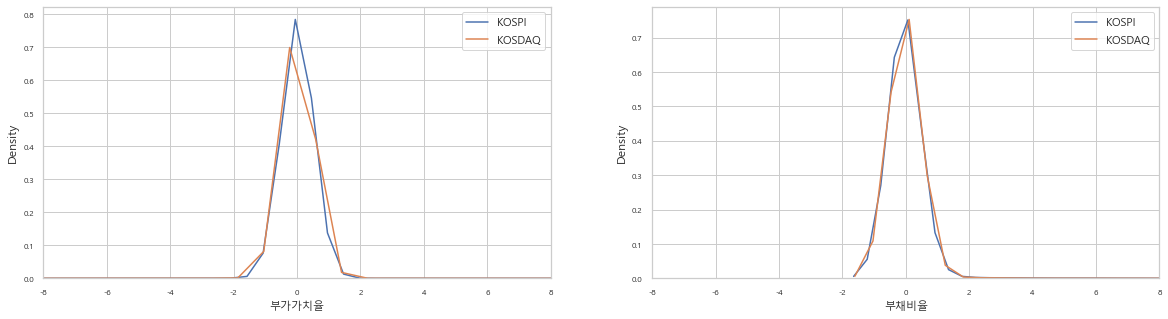

In [84]:
features = kospi_s.columns.values[0:2]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

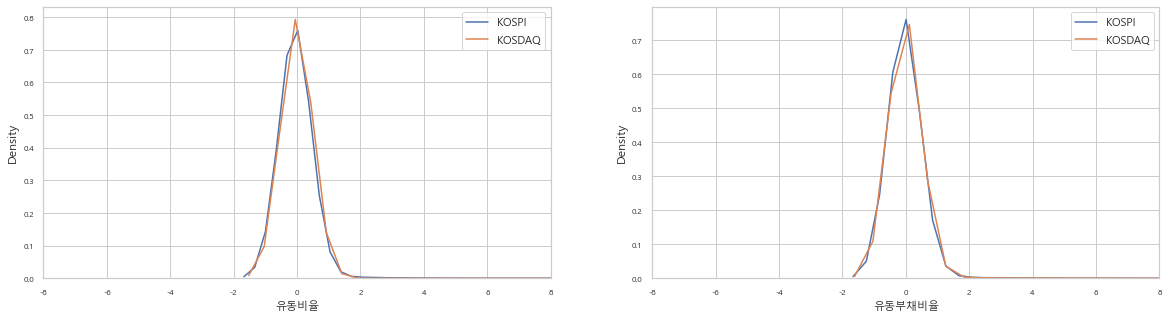

In [85]:
features = kospi_s.columns.values[2:4]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

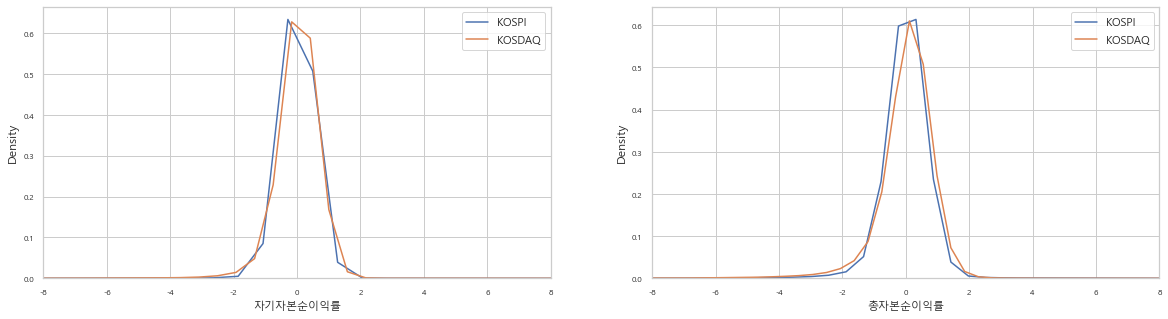

In [86]:
features = kospi_s.columns.values[4:6]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

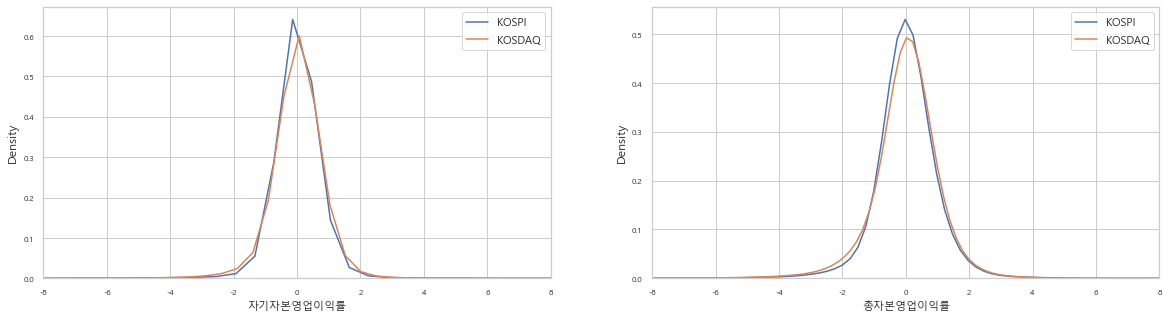

In [87]:
features = kospi_s.columns.values[6:8]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

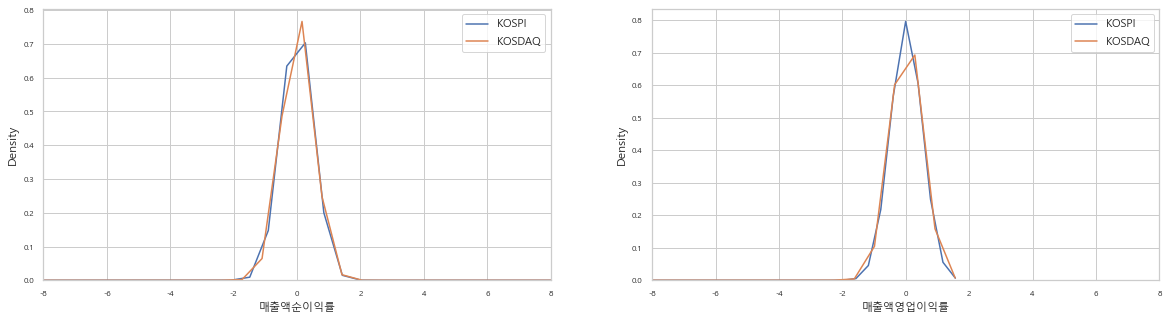

In [88]:
features = kospi_s.columns.values[8:10]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

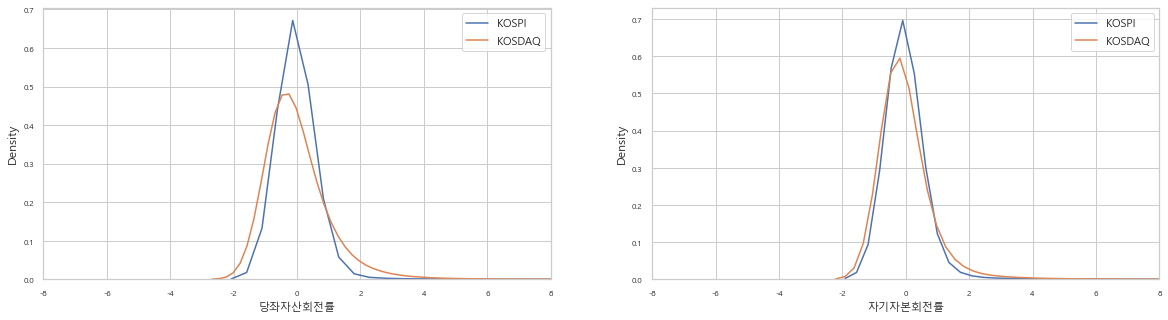

In [89]:
features = kospi_s.columns.values[10:12]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

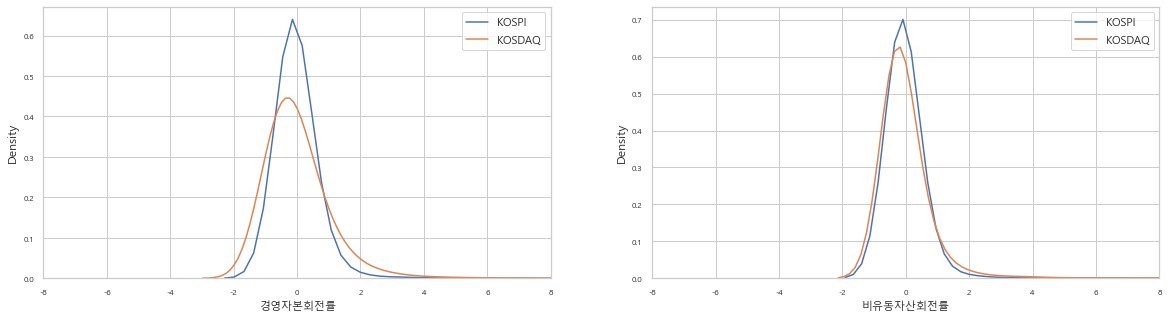

In [90]:
features = kospi_s.columns.values[12:14]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

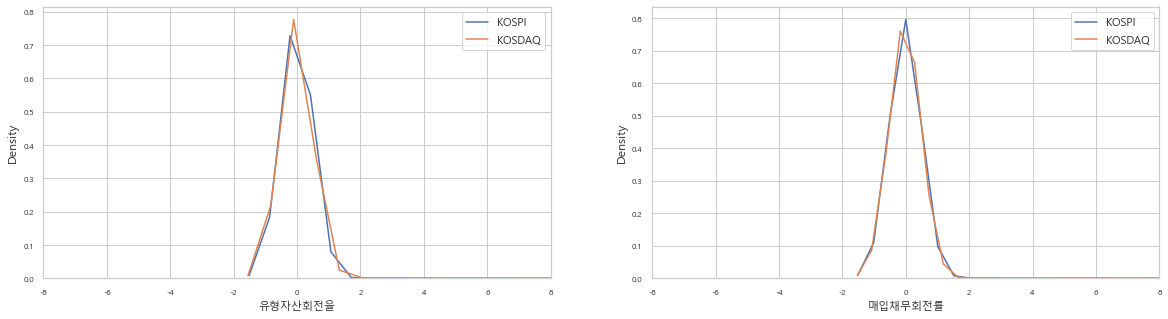

In [91]:
features = kospi_s.columns.values[14:16]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

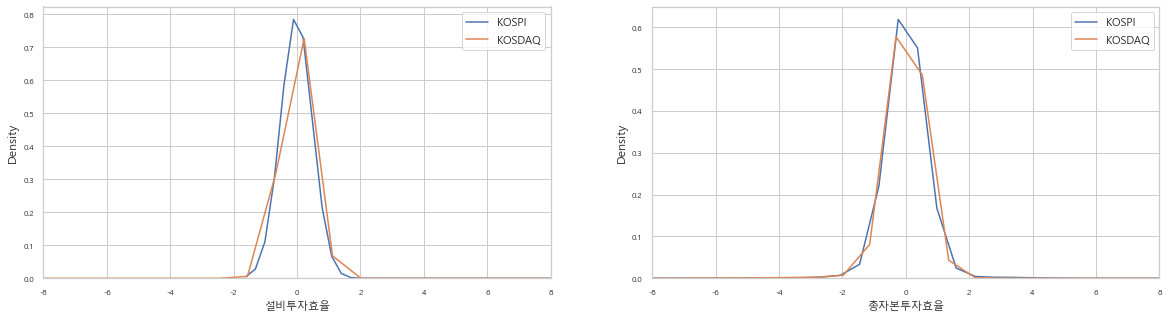

In [92]:
features = kospi_s.columns.values[16:18]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

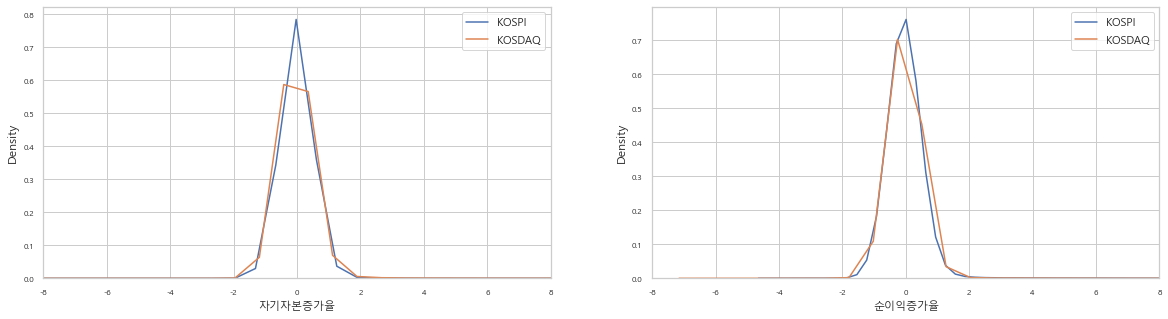

In [93]:
features = kospi_s.columns.values[18:20]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

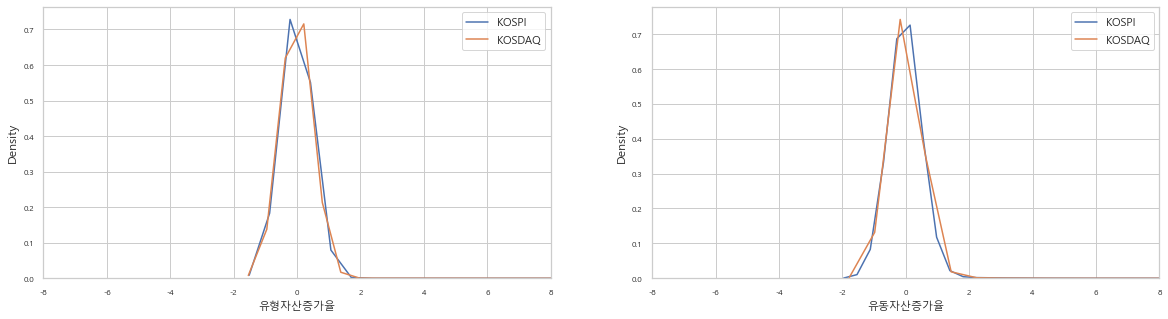

In [95]:
features = kospi_s.columns.values[20:22]
plot_new_feature_distribution(kospi_s, kosdaq_s, 'KOSPI', 'KOSDAQ', features, 2)

In [39]:
kosdaq

,회사명,거래소코드,회계년도,순운전자본비율,총자본순이익률,경영자본순이익률,경영자본회전률,매입채무회전률,설비투자효율,총자본투자효율,...,종가,종가변동률,년,key,부도,신종채권_운영,신종채권_시설,신종채권_기타,비유동장기적합률,자기자본순이익률
0,(주)CMG제약,58820.0,2000/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,2000.0,588202001.0,0.0,0.0,0.0,0.0,0.00,0.00
1,(주)CMG제약,58820.0,2001/12,22.76,0.53,0.53,0.77,24.84,48.33,8.76,...,1420.0,-0.633803,2001.0,588202002.0,0.0,0.0,0.0,0.0,48.88,1.26
2,(주)CMG제약,58820.0,2002/12,7.98,-12.42,-12.61,1.48,58.88,3.90,0.79,...,520.0,-0.633803,2002.0,588202003.0,0.0,0.0,0.0,0.0,81.79,-29.43
3,(주)CMG제약,58820.0,2003/12,35.58,0.83,0.84,1.33,26.59,289.02,16.80,...,800.0,0.538462,2003.0,588202004.0,0.0,0.0,0.0,0.0,39.12,1.70
4,(주)CMG제약,58820.0,2004/12,24.97,-47.69,-47.74,1.61,24.16,-412.59,-37.94,...,550.0,-0.312500,2004.0,588202005.0,0.0,0.0,0.0,0.0,49.86,-86.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,흥구석유(주),24060.0,2016/12,14.15,2.77,4.06,2.68,179576.67,18.38,8.84,...,3425.0,0.126645,2016.0,240602017.0,0.0,0.0,0.0,0.0,85.17,3.17
26828,흥구석유(주),24060.0,2017/12,8.68,2.60,3.86,2.91,5044.25,18.58,8.80,...,2775.0,-0.189781,2017.0,240602018.0,0.0,0.0,0.0,0.0,90.23,2.97
26829,흥구석유(주),24060.0,2018/12,11.59,3.06,4.52,3.17,5128.70,19.56,9.80,...,2705.0,-0.025225,2018.0,240602019.0,0.0,0.0,0.0,0.0,87.80,3.38
26830,흥구석유(주),24060.0,2019/12,21.47,10.44,15.19,2.76,23497.93,42.99,18.02,...,5360.0,0.981516,2019.0,240602020.0,0.0,0.0,0.0,0.0,77.27,11.25


In [45]:
#kosdaq.to_csv('kosdaq.csv')